LOUVAT Charles

MOHAMED Ben-Hazem

github : https://github.com/carloslvt/M2SDTS
        
----

Cet ensemble de données est constitué d'informations sur les passagers du navire RMS Titanic. Nous disposons également d'informations sur le fait que tel ou tel passager a survécu ou non à cette catastrophe. Pour chaque personne individuelle, nous avons des informations sur :

- PassengerId : numéro d'identification des passagers dans l'ensemble de données.
- Name : Nom du passager
- Survived : La personne a survécu ou non (0 pour Non et 1 pour Oui).
- Pclass : Avec quelle classe de billet le passager voyageait.
- Sex : Homme ou femme
- Age : Âge de la personne en années
- Sibsp : Nombre de frères et sœurs/époux sur le Titanic
- parch : Nombre de parents/enfants sur le Titanic
- Ticket : Numéro du ticket
- Fare : Montant payé par la personne pour voyager.
- Cabin : Numéro de la cabine du passager
- Embarked : Port d'embarquement ( C = Cherbourg, Q = Queenstown, S = Southampton)


# Exploratory Data Analysis 
Objectif
----

- Comprendre du mieux possible nos données
- Développer une première stratégie de modélisation

#### Tout d'abord, nous devons importer les bibliothèques nécessaires pour aller plus loin...

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Chargeons les données et vérifions à quoi elles ressemblent...

In [165]:
# passager du titanic
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Voici à quoi ressemblent nos données.
- Comme nous pouvons le voir ci-dessus, l'ensemble de données a 12 colonnes, que nous avons pu décrire plus haut.
- Ici, la colonne Survived est la target. 
- Nous avons des types de caractéristiques numériques et catégorielles.


In [166]:
df = data.copy()

### Analyse sur la forme

#### Maintenant, récupérerons quelques informations sur les données.

In [167]:
print(f"La forme des données est : {df.shape}\n")
df.info()

La forme des données est : (891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- La forme des données est (891,12), ce qui signifie que nous avons 891 lignes et 12 colonnes. Chaque ligne contient des informations sur un passager.
- Dans le résultat ci-dessus, la colonne se compose du nom de la colonne, le nombre de valeurs non nulles, et le type de données que compose la colonne.
- Dans la colonne âge, nous pouvons voir que sur 891 valeurs, nous avons 714 valeurs non nulles. Cela implique que nous avons 177 valeurs Null.
- De même, dans la colonne Cabin, sur 891 valeurs, nous avons seulement 204 valeurs non nulles, ce qui implique que nous avons 687 valeurs nulles. Nous n'avons que 23% des valeurs présentes dans l'ensemble de données et 77% des valeurs sont manquantes, nous pouvons donc abandonner cette variable.
- À l'exception de l'âge et de la cabin, toutes les caractéristiques n'ont pas de valeurs nulles.

Pour mieux comprendre le type des colonnes, regardons de plus près.


In [168]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

Nous avons donc 2 variables qualitatives et 10 variables quantitatives.

Pour ce qui est des valeurs manquantes, visualisons les.

<AxesSubplot:>

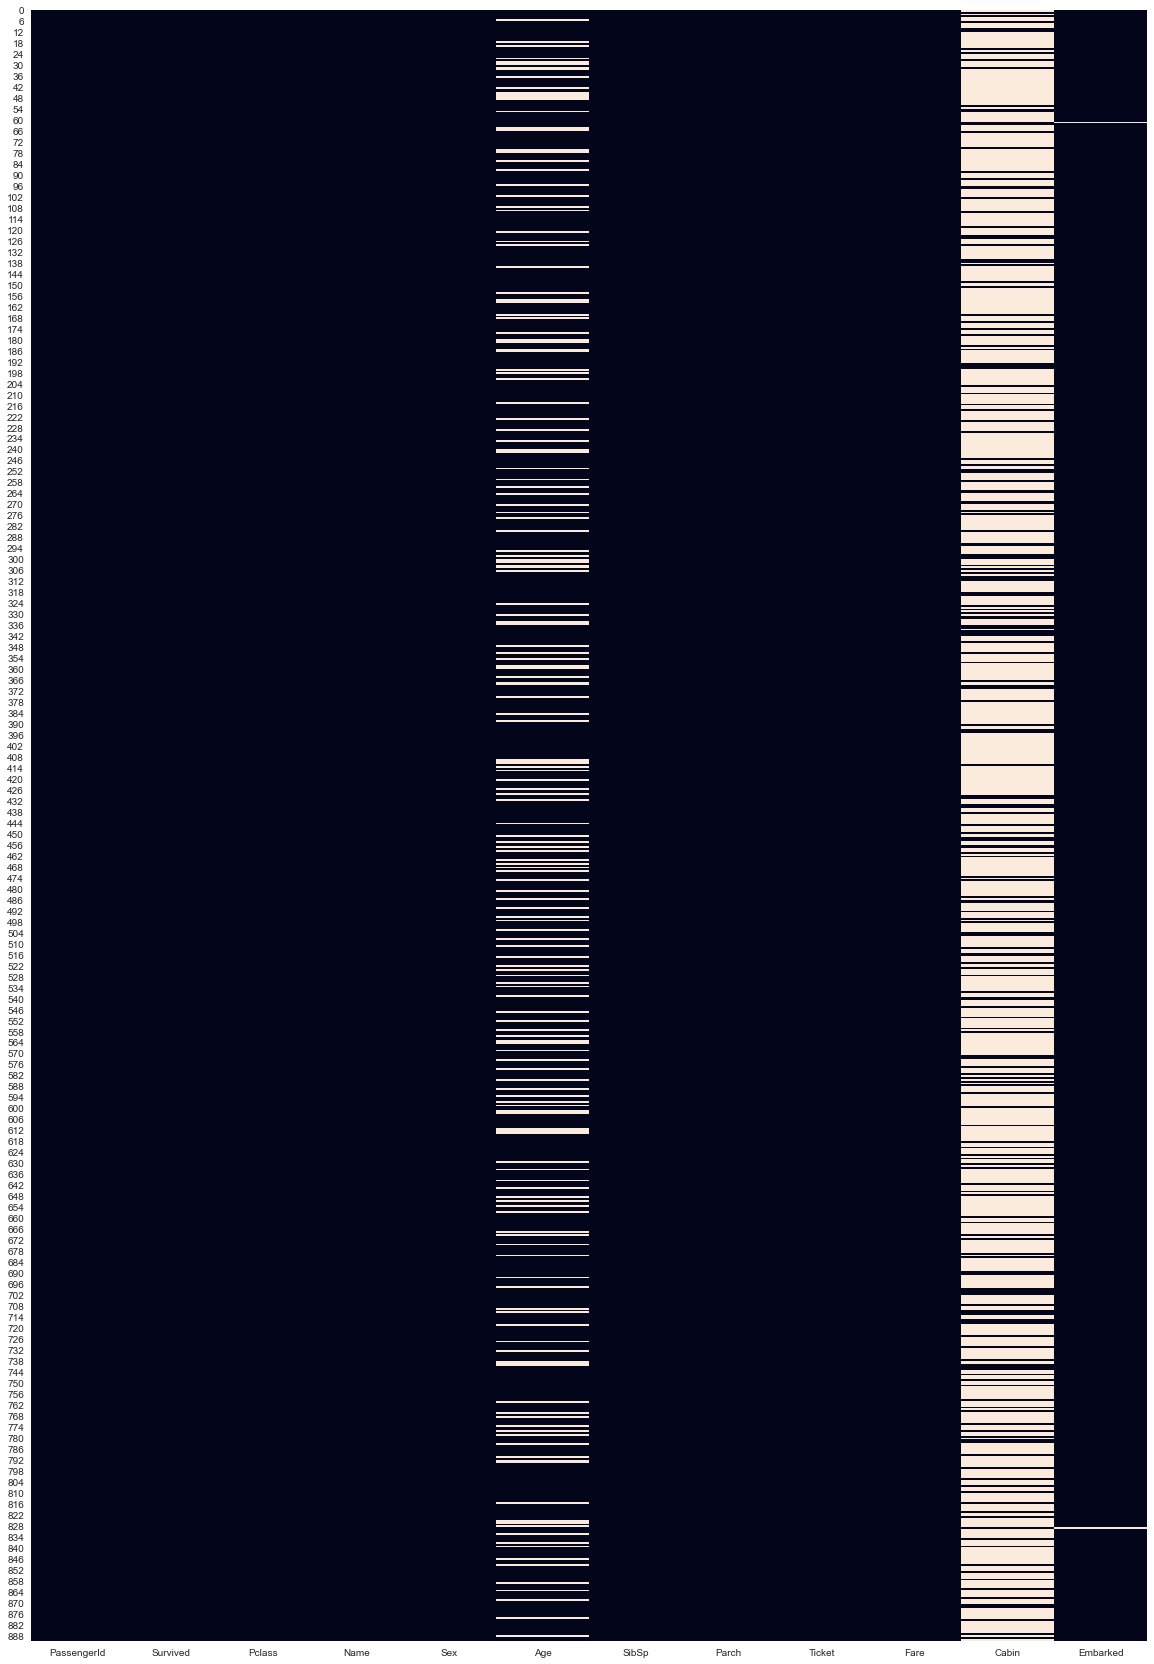

In [169]:
# visualise les valeurs manquantes en graphique (noir=valeur, blanc=na) 
plt.figure(figsize=(20,30))
sns.heatmap(df.isna(), cbar=False)

#### Voyons maintenant ce que donne les informations sur les caractéristiques numériques.

In [170]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Ici, certaines caractéristiques ne sont pas nécessaires, comme l'identifiant du passager, et nous allons donc les ignorer. Les seules caractéristiques qui peuvent être considérées comme numériques et qui doivent être analysées comme des caractéristiques numériques sont Age et Fare.
- Dans la caractéristique Age, nous pouvons voir que le compte est de 714, ce qui signifie que pour 714 personnes nous avons une valeur d'âge, les autres sont manquantes. Nous avons vu cela ci-dessus. Nous avons un age moyen des passagers de 29.69 ans. Nous avons un écart-type de 14.52, ce qui signifie que la plupart des personnes ont un âge compris entre (29.69-14.52) et (29.69+14.52). L'âge minimum est de 0,42 dans l'image ci-dessus, ce qui signifie que sur l'ensemble des passagers, l'âge minimum est de 0,4 an. Et nous avons une valeur de 25% de 20,12 ans, ce qui signifie que 25% des passagers ont un âge inférieur à 20,12 ans. De même, nous avons une valeur de 50% de 28,00, ce qui signifie que 50% des passagers ont un âge inférieur à 28,00 ans. De même, nous avons une valeur de 75% de 38,00, ce qui signifie que 75% des personnes ont un âge inférieur à 38,00 ans. La valeur maximale est de 80.00 ans. Cela signifie que parmi tous les passagers, la personne la plus âgée a 80.00 ans.
- Dans la caractéristique Fare, nous pouvons voir que le compte est de 891, ce qui signifie qu'il n'y a pas de valeur manquante. Nous avons un tarif moyen des passagers de 32,2. Nous avons un écart-type de 49,7, ce qui signifie que la plupart des personnes ont payé entre (32,2-49.7) et (32,2+49.7). Le tarif minimum est de 0 , ce qui signifie que sur l'ensemble des passagers, certain n'ont pas payé le voyage. Et nous avons une valeur de 25% de 7,9, ce qui signifie que 25% des passagers ont payé moins de 7,9. De même, nous avons une valeur de 50% de 14,45, ce qui signifie que 50% des passagers ont payé moins de 14,45. De même, nous avons une valeur de 75% de 31,00, ce qui signifie que 75% des personnes ont payé moins de 31,00. La valeur maximale est de 512,33 ans. Cela signifie que parmi tous les passagers, certain on payé 512.

#### Examinons la colonne target

In [171]:
# Remplace 1 par oui et 0 par non
df["Survived"] = df["Survived"].map({1:"Oui" , 0 :"Non"})
df["Survived"].value_counts()

Non    549
Oui    342
Name: Survived, dtype: int64

Nous pouvons voir que sur 891 passagers, 549 n'ont pas pu survivre à cette catastrophe, et 342 ont survécu. Donc les données que nous avons ne peuvent pas être considérées comme déséquilibrées puisque qu'elles sont presque à egal.

Puisque nous avons fait l'analyse de base, passons maintenant à l'analyse visuelle. D'abord, nous allons faire une analyse bi-variée puis une analyse uni-variée.

### Analyse sur le fond

#### Analyse bi-varié

Les diagrammes de paires sont les diagrammes les plus largement utilisés pour effectuer une analyse de visualisation à deux variables. Cependant, selon le nombre de donnée, qui peut être difficile à analyser.


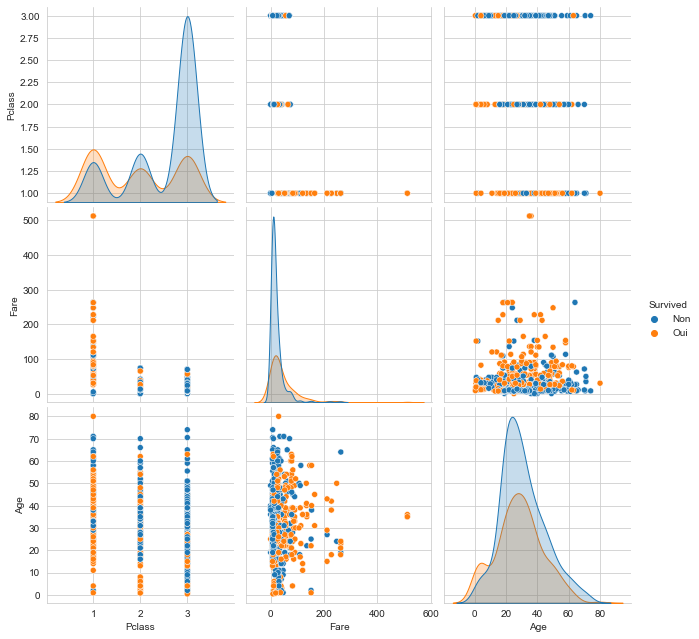

In [172]:
# ici, nous ne prenons que 4 caractéristiques pour effectuer l'analyse.
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

- D'après la grille de tracés ci-dessus, nous pouvons voir que les passagers qui ont payé un tarif plus élevé ou qui ont voyagé dans la classe supérieure ont plus de chances de survivre.
- L'âge donne également quelques informations, comme le fait que les jeunes ont plus de chances de survivre que les personnes âgées.
- L'image n'est pas très claire avec les graphiques par paires, nous allons donc procéder à une analyse univariée pour comprendre ce qui se passe exactement.

#### Analyse uni-varié

<AxesSubplot:xlabel='Survived', ylabel='count'>

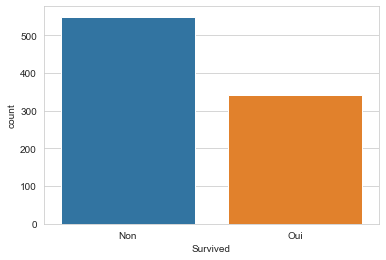

In [173]:
sns.countplot(df['Survived'],data = df)

Comme nous pouvons le voir, "Non" a la valeur > 500, ce qui signifie que ces personnes n'ont survécu à la catastrophe et qu'environ 350 personnes ont survécu. 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

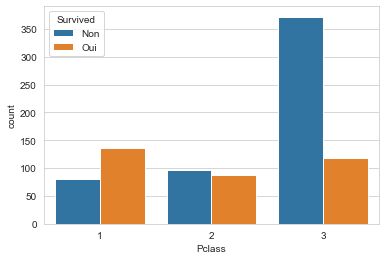

In [174]:
sns.countplot(df["Pclass"],hue = df["Survived"],data = df)

- Dans le graphique de sortie ci-dessus, nous pouvons voir que les personnes qui voyageaient en 3ème classe, la plupart d'entre elles n'ont pas survécu.
- Les personnes qui voyageaient en 2ème classe, dont le nombre de morts et de survivants est presque égal.
- Les personnes qui voyageaient en 1ère classe, parmi lesquelles un grand nombre de personnes ont survécu.

En conclusion, nous pouvons dire que les personnes qui voyageaient en classe inférieure, comme la 3ème, ont plus de chances de mourir et que les personnes qui voyageaient en classe supérieure, comme la 1ère, ont plus de chances de survivre.

<AxesSubplot:xlabel='Sex', ylabel='count'>

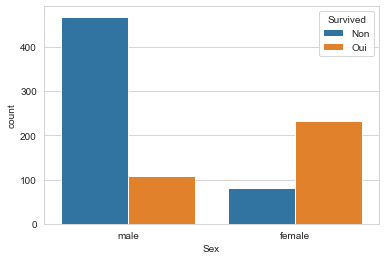

In [175]:
sns.countplot(df["Sex"],hue = df["Survived"],data = df)

- Comme nous pouvons le voir dans le graphique ci-dessus, la plupart des passagers masculins sont morts. Et sur l'ensemble des passagers féminins, la plupart ont survécu.

Nous pouvons dire que les passagers masculins ont plus de chances de mourir et que les passagers féminins.

La caractéristique Age comprend quelques valeurs nulles, nous devons donc d'abord les traiter. Ici, je remplis les valeurs nulles avec la médiane de la caractéristique Age. Nous savons que la médiane de la caractéristique Age est 28.

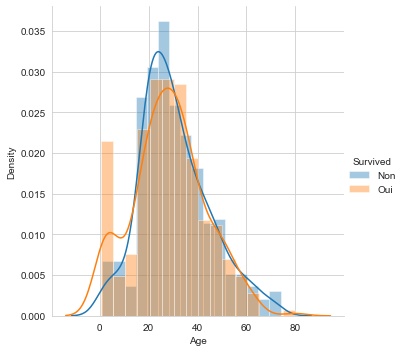

In [176]:
# Rempli les valeurs nulles
# df['Age'] = df['Age'].fillna(df['Age'].median())

# graphe
sns.FacetGrid(df, hue="Survived", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

- Les passagers âgés de moins de 20 ans, ont survécu en plus grand nombre. Cela signifie que lors des opérations de sauvetage, la priorité a été donnée aux enfants ou aux adolescents.
- Les personnes âgées de plus de 20 ans et de moins de 45 ans. Le nombre de passagers qui sont morts est supérieur au nombre de passagers qui ont survécu.

Comme nous pouvons le voir, le reste des informations semblent assez flou sur le graphique.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

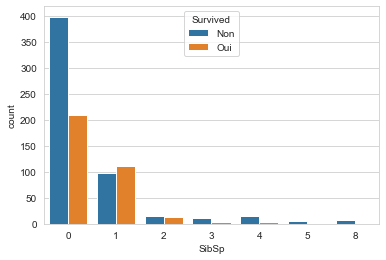

In [177]:
sns.countplot(df["SibSp"],hue = df["Survived"],data = df)

- Les passagers qui n'ont pas de frère ou de sœur sont pour la plupart morts.
- Les passagers ayant un ou deux frère/sœur ont une chance égale de mourir et de survivre.
- Les passagers qui ont un nombre plus élevé de frères et sœurs comme 3, 4, 5, 8 ont une chance très faible de survivre ou presque 0% de chance de survivre.

<AxesSubplot:xlabel='Parch', ylabel='count'>

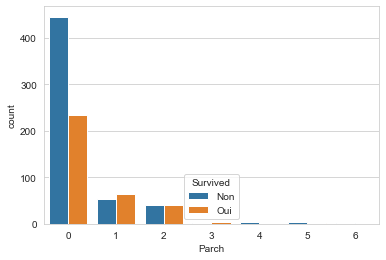

In [178]:
sns.countplot(df["Parch"],hue = df["Survived"],data = df)

Ici nous avons un peu le même cas de figure que pour les frères et soeurs :
- Les passagers qui n'ont pas d'enfant sont pour la plupart morts.
- Les passagers ayant un ou deux enfants ont une chance égale de mourir et de survivre.
- Les passagers ayant 3 enfants ont presque tous survécu.
- Les passagers qui ont un nombre plus élevé d'enfants comme 4, 5 ont une chance très faible de survivre ou presque 0% de chance de survivre.

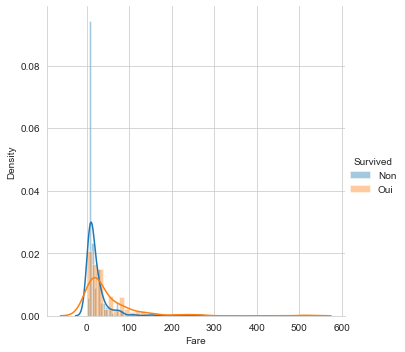

In [179]:
sns.FacetGrid(df, hue='Survived', size=5) \
 .map(sns.distplot, 'Fare') \
 .add_legend();
plt.show();

Les passagers qui ont payé un tarif bas ont plus de chances de mourir. En revanche, les passagers qui ont payé un tarif élevé ont plus de chances de survivre. Cette observation est identique à celle de la Pclass : les personnes riches ont plus de chances de survivre.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

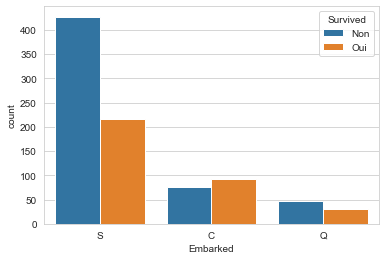

In [180]:
sns.countplot(df["Embarked"],hue = df["Survived"],data = df)

- Les passagers qui ont commencé leur voyage à Southampton, la plupart d'entre eux sont morts.
- Il n'y a pas beaucoup de différence dans les chances de survie ou de décès des personnes qui ont commencé leur voyage à Cherbourg, Queenstown.

# Pre-processing
## Nettoyage

#### En résumé :

Notre DataSet est constitué de 12 caractéristiques, mais nous allons nous séparer de 3 caractéristiques car elles sont inutiles et ne nous donnent pas beaucoup d'informations. Par exemple, la caractéristique PassengerId et Ticket ne sont pas utiles pour la prédiction, il est donc préférable de les laisser tomber de l'ensemble de données. Et dans l'ensemble de données de la Cabin, nous avons 77% de valeurs manquantes, il n'est donc pas trivial de traiter cette caractéristique. 

Dans un premier temps, nous devons récuperer les titres présent dans la variable Name grâce à une regex.

In [181]:
df = data.copy()

title = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
df['Title'] = title

print(title.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64


Nous pouvons voir qu'il y a beaucoup de valeur seul, simplifions cette variable.

In [182]:
new_title = {"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}

rare_title = {}
for title in ['Lady', 'Countess','Capt', 'Col','Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
    rare_title[title] = "Rare"
    
new_title.update(rare_title)

df["Title"] = df["Title"].replace(new_title)

print(set(list(df["Title"])))

{'Master', 'Mr', 'Mrs', 'Rare', 'Dr', 'Miss'}


Nous pouvons maintenant supprimer les variables indésirables.

In [183]:
df = df.drop(["PassengerId", "Ticket" , "Name", "Cabin"], axis = 1)
df = df.dropna()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## Encodage

Maintenant nous devons encoder les variables qualitatives pour pouvoir les utiliser dans notre modèle. Pour ce faire, nous utilisons le One-Hot encoding afin de transformer les caractéristiques catégoriques en plusieurs caractéristiques binaires

In [184]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [185]:
from sklearn.preprocessing import LabelEncoder

def _encodage(df):
    """
    Permet de encoder les variables de type "object" en "int"
    
    :param: df: dataframe en entrée
    return: dataframe encoder
    """
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    
    columns = ['Embarked', 'Pclass', 'Title']
    df = pd.get_dummies(df, columns=columns)
    
    return df

## TrainTest

Nous splittons notre dataset en 2 afin d'avoir une dataset d'entrainement et un dataset de test. Nous décidons d'utiliser 70% du dataset pour l'entrainement et 30% pour le test. Nous choisissons ces paramètres car si nous utilisons trop de données pour l'entrainement nous allons avoir du sur-apprentissage, et inversement si nous n'avons pas assez de données pour l'entrainement nous allons avec du sous-apprentissage.

In [186]:
df_prep = _encodage(df)

trainset, testset = train_test_split(df_prep, test_size=0.2, random_state=19)
trainset['Survived'].value_counts()

0    342
1    227
Name: Survived, dtype: int64

In [187]:
df_prep.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0,1,0,0
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,1,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,1,0,0,0
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,0,0,1,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,1,0,0


## Pre-processing

In [188]:
def _preprocessing(df):
    """
    split le dataframe en données d'apprentissage (X) et target 'y'
    
    :param: df: dataframe en entrée
    return: X et y
    """   
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    
    print(y.value_counts())
    return X, y

In [189]:
X_train, y_train = _preprocessing(trainset)

0    342
1    227
Name: Survived, dtype: int64


In [190]:
X_test, y_test = _preprocessing(testset)

0    82
1    61
Name: Survived, dtype: int64


# Procédure d'évaluation

Maintenant que nous avons nos différents dataset prêt, nous pouvons passer à l'évaluation du modèle. Ici encore, nous écrivons une fonction qui va permettre d'entrainement le modèle, de prédire les données test et ainsi calculer la matrice de confusion ainsi qu'un petit rapport de plusieurs métrics (precision, recall, f1-score et accuracy)

In [191]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve

def _evaluation(model):
    """
    fonction d'évaluation d'un modèle
    
    :param: model: model de machine learning en entrée
    return: matrice de confusion, rapport d'évaluation
    """
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    cf_matrix = confusion_matrix(y_test, ypred)
    sns.heatmap(cf_matrix, annot=True)
    
    print(classification_report(y_test, ypred))

# Modélisation

Pour l'évaluation, nous avons décidé de choisir le multilayer perceptron "MLP":

Le perceptron multicouche (multilayer perceptron MLP) est un type de réseau neuronal artificiel organisé en plusieurs couches au sein desquelles une information circule de la couche d'entrée vers la couche de sortie uniquement ; il s'agit donc d'un réseau à propagation directe (feedforward). Chaque couche est constituée d'un nombre variable de neurones, les neurones de la dernière couche (dite « de sortie ») étant les sorties du système global. 

Commençons par entrainer un modèle avec les paramètres par défaut, nous verrons ensuite les différents paramètres disponibles.

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.87      0.75      0.81        61

    accuracy                           0.85       143
   macro avg       0.85      0.83      0.84       143
weighted avg       0.85      0.85      0.84       143



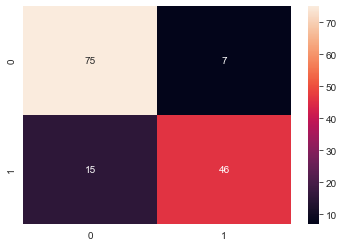

In [192]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=19)
_evaluation(mlp)

Nous obtenons un score de 85%, essayons maintenant en modifiant les hyperparamètres :

- hidden layer sizes est un tuple qui spécifie le nombre de neurones de chaque couche cachée, de l’entrée (non comprise) vers la sortie (non comprise). Par exemple, une couche cachée de 55 neurones, hidden layer sizes=(55) ; pour trois couches cachées de taille respectivement 50, 12 et 100 neurones, hidden layer sizes=(50,12,100).
- activation définit la fonction d’activation pour les couches cachées
- solver spécifie l’algorithme utilisé pour minimiser la fonction de perte en sortie
- alpha est la magnitude de la régularisation L2
- max iter indique le nombre max d’itérations du solveur
- tol est un facteur de tolérance qui permet d’arrêter le solveur précocèment lorsque qu’il n’y a pas d’amélioration d’au moins ce paramètre lors de deux itérations successives
- learning rate init permet de contrôler la taille du pas

Ne sachant pas exactement quels sont les hyperparamètres optimaux, nous effectuons un RandomizedSearch afin de les trouver. L’avantage de la méthode random search est qu’elle permet de couvrir des zones non visitées par le gridsearch et donc d’avoir plus d’informations. Et cela sera d’autant plus vrai lorsque le nombre d’itérations sera assez élevé.

In [193]:
from sklearn.model_selection import RandomizedSearchCV

tuned_param = [{'solver': ['sgd'], 
                'activation':['identity', 'logistic', 'tanh', 'relu'],
                'max_iter': [100, 200],
                'learning_rate_init': [3e-04, 3e-05],
                'learning_rate': ['constant', 'adaptive'],
                'alpha': [1e-06, 1e-07, 1e-08],
                'hidden_layer_sizes': [(128), (128, 64), (256, 128, 64), (512, 256, 128, 64)],
                'batch_size': [32, 64, 128]},
               {'solver': ['adam', 'lbfgs'],
               'activation':['identity', 'logistic', 'tanh', 'relu'],
               'max_iter': [100, 200],
               'learning_rate_init': [3e-04, 3e-05],
               'alpha': [1e-06, 1e-07, 1e-08],
               'hidden_layer_sizes': [(128), (128, 64), (256, 128, 64), (512, 256, 128, 64)],
               'batch_size': [32, 64, 128]}
              ]

mlp = RandomizedSearchCV(MLPClassifier(random_state=19), cv=5, n_iter=20, param_distributions=tuned_param)
mlp.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=20,
                   param_distributions=[{'activation': ['identity', 'logistic',
                                                        'tanh', 'relu'],
                                         'alpha': [1e-06, 1e-07, 1e-08],
                                         'batch_size': [32, 64, 128],
                                         'hidden_layer_sizes': [128, (128, 64),
                                                                (256, 128, 64),
                                                                (512, 256, 128,
                                                                 64)],
                                         'learning_rate': ['constant',
                                                           'adaptive'],
                                         'learning_rate_init': [0.0003, 3e-05],
                                         'max_iter': [100, 200],
                                         '

In [197]:
best_model = mlp.best_estimator_

best_model.fit(X_train, y_train)
ypred = best_model.predict(X_test)

print(f'Accuracy score : {accuracy_score(y_test, ypred)}')

Accuracy score : 0.8601398601398601


In [195]:
print(f'Paramètres : {mlp.best_params_}')

Paramètres : {'solver': 'sgd', 'max_iter': 200, 'learning_rate_init': 0.0003, 'learning_rate': 'constant', 'hidden_layer_sizes': (256, 128, 64), 'batch_size': 128, 'alpha': 1e-08, 'activation': 'identity'}


Super, nous augmentons notre score grâce à ces paramètres choisi par le Randomized search. Nous avons donc 3 couches cachées, une taille de batch de 128 et un optimizer "sgd".